In [1]:
import requests 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup 
from sklearn.preprocessing import LabelEncoder
import datetime
from datetime import datetime, timedelta
import time
import schedule
import h5py
import pytrends
from pytrends.request import TrendReq

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Create directory
import os

path = './data'
# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist: 
  # Create a new directory because it does not exist 
  os.makedirs(path)
  print("new directory is created!")

In [3]:
today = datetime.now().date()
time_delta_D = timedelta(days=7)
lastweek = today - time_delta_D

today = str(today)
lastweek = str(lastweek)

today

'2022-02-20'

In [4]:
#Show list of url
file_url = pd.read_csv('url.csv')
file_url

,url_list
0,https://finance.yahoo.com/gainers
1,https://finance.yahoo.com/currencies
2,https://coinmarketcap.com/nft/collections/
3,https://finance.yahoo.com/cryptocurrencies/


In [5]:
def web_scrape(url):
    
    Bsoup = BeautifulSoup(requests.get(url).text)
    headers = [header.text for listing in Bsoup.find_all('thead') for header in listing.find_all('th')]
    r_data = {header:[] for header in headers}

    for rows in Bsoup.find_all('tbody'):
      for row in rows.find_all('tr'):
        
        if len(row) != len(headers): continue
        for idx, cell in enumerate(row.find_all('td')):
              r_data[headers[idx]].append(cell.text)
    return pd.DataFrame(r_data)


def job():

    df0 = web_scrape(file_url['url_list'].iloc[0])
    df00 = df0.iloc[:, 0:3]
    df1 = web_scrape(file_url['url_list'].iloc[1])
    df01 = df1.iloc[:, 0:3]
    df2 = web_scrape(file_url['url_list'].iloc[2])
    df02 = df2.iloc[:, 0:5]
    df3 = web_scrape(file_url['url_list'].iloc[3])
    df03 = df3.iloc[:, 0:3]
    
    #chosen url
    df = df03 
    
    h5File = (today + '_web_scrape.h5')
    df.to_hdf(h5File, 'w')
    print("wrote hdf5 file done")   
    
#schedule.every(1).minutes.do(job)
#schedule.every(1).hour.do(job)
schedule.every(1).day.at("10:30").do(job)

Every 1 day at 10:30:00 do job() (last run: [never], next run: 2022-02-21 10:30:00)

In [6]:
#https://finance.yahoo.com/gainers
df0 = web_scrape(file_url['url_list'].iloc[0]) #first row
df00 = df0.iloc[:, 0:3]#first until 4th columns

#https://finance.yahoo.com/currencies
df1 = web_scrape(file_url['url_list'].iloc[1])
df01 = df1.iloc[:, 0:3]

#https://coinmarketcap.com/nft/collections/
df2 = web_scrape(file_url['url_list'].iloc[2])
df02 = df2.iloc[:, 0:5]

#https://finance.yahoo.com/cryptocurrencies/
df3 = web_scrape(file_url['url_list'].iloc[3])
df03 = df3.iloc[:, 0:3]

In [7]:
#chose url 00
df = df00 

#Save to csv file
df.to_csv(today + '_web_scrape.csv')

#Save to HDF5 file
h5File = (today + '_web_scrape.h5')
df.to_hdf(h5File, 'w')
print("wrote hdf5 file done")

hf = pd.read_hdf(h5File)
list(hf.keys())
hf.shape

hf.head(2)

wrote hdf5 file done


,Symbol,Name,Price (Intraday)
0,OBMP,"Theralink Technologies, Inc.",1.1000
1,AMPL,"Amplitude, Inc.",20.66


In [8]:
#chose url 1
df = df01 

#Save to csv file
df.to_csv(today + '_web_scrape.csv')

#Save to HDF5 file
h5File = (today + '_web_scrape.h5')
df.to_hdf(h5File, 'w')
print("wrote hdf5 file done")

hf = pd.read_hdf(h5File)
#list(hf.keys())
#hf.shape

hf.head(2)

wrote hdf5 file done


,Symbol,Name,Last Price
0,EURUSD=X,EUR/USD,1.1326
1,JPY=X,USD/JPY,115.0500


In [9]:
#chose url 2
df = df02 

#Save to csv file
df.to_csv(today + '_web_scrape.csv')

#Save to HDF5 file
h5File = (today + '_web_scrape.h5')
df.to_hdf(h5File, 'w')
print("wrote hdf5 file done")

hf = pd.read_hdf(h5File)
#list(hf.keys())
#hf.shape

hf.head(2)

wrote hdf5 file done


,#,Name,Volume24h,Est. Market Cap,Floor Price
0,1,I'M AIKO,245.78 SOL77.56%,"4,427.43 SOL",2.1 SOL
1,2,Solana Sluts,22.76 SOL1.61%,608.63 SOL,0.69 SOL


In [10]:
#chose url 3
df = df03 

#Save to csv file
df.to_csv(today + '_web_scrape.csv')

#Save to HDF5 file
h5File = (today + '_web_scrape.h5')
df.to_hdf(h5File, 'w')
print("wrote hdf5 file done")

hf = pd.read_hdf(h5File)
hf.head(2)

wrote hdf5 file done


,Symbol,Name,Price (Intraday)
0,BTC-USD,Bitcoin USD,"38,183.71"
1,ETH-USD,Ethereum USD,"2,620.19"


# Merge datasets collected from several days

In [11]:
#day01
hf220219 = pd.read_hdf('2022-02-19_web_scrape.h5')
hf220219.rename(columns = {'Price (Intraday)':'day01'},inplace = True)
hf220219.head(2)

,Symbol,Name,day01
0,BTC-USD,Bitcoin USD,"40,243.82"
1,ETH-USD,Ethereum USD,"2,781.66"


In [12]:
#day02
hf220220 = pd.read_hdf('2022-02-20_web_scrape.h5')
hf220220.rename(columns = {'Price (Intraday)':'day02'},inplace = True)
hf220220.head(2)

,Symbol,Name,day02
0,BTC-USD,Bitcoin USD,"38,183.71"
1,ETH-USD,Ethereum USD,"2,620.19"


In [13]:
hf220220 = hf220220.drop(columns=['Name'])
hf220220.head(2)

,Symbol,day02
0,BTC-USD,"38,183.71"
1,ETH-USD,"2,620.19"


In [14]:
#Merge datasets become one

hfmerged = pd.merge(hf220219, hf220220, on=["Symbol", "Symbol"])
hfmerged= hfmerged.drop(columns=['Name'])
hfmerged.head(5)

,Symbol,day01,day02
0,BTC-USD,"40,243.82","38,183.71"
1,ETH-USD,"2,781.66","2,620.19"
2,USDT-USD,1.0006,1.0005
3,BNB-USD,402.23,376.90
4,USDC-USD,0.999575,0.999592


In [15]:
print(hfmerged.isnull().sum())

Symbol    0
day01     0
day02     0
dtype: int64


In [16]:
hfmerged.dtypes

Symbol    object
day01     object
day02     object
dtype: object

In [17]:
#Split decimals then removed
hfmerged[['day_01', 'day_01B']] = hfmerged['day01'].str.split('.', 1, expand=True)
hfmerged[['day_02', 'day_02B']] = hfmerged['day02'].str.split('.', 1, expand=True)
hfmerged = hfmerged.drop(columns=['day01', 'day_01B','day02', 'day_02B'])

hfmerged.head(5)

,Symbol,day_01,day_02
0,BTC-USD,"40,243","38,183"
1,ETH-USD,"2,781","2,620"
2,USDT-USD,1,1
3,BNB-USD,402,376
4,USDC-USD,0,0


In [18]:
hfmerged['day_01'] = hfmerged[('day_01')].replace(',','', regex=True)
hfmerged['day_02'] = hfmerged[('day_02')].replace(',','', regex=True)
hfmerged.head(5)

,Symbol,day_01,day_02
0,BTC-USD,40243,38183
1,ETH-USD,2781,2620
2,USDT-USD,1,1
3,BNB-USD,402,376
4,USDC-USD,0,0


In [19]:
#Change dtypes from str become float
hfmerged['day_01'] = hfmerged[('day_01')].astype(float)
hfmerged['day_02'] = hfmerged[('day_02')].astype(float)
hfmerged.dtypes

Symbol     object
day_01    float64
day_02    float64
dtype: object

In [20]:
#Transpose
#hfmerged_T = hfmerged.set_index('Symbol').T
hfmerged_T = hfmerged.T
hfmerged_T.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Symbol,BTC-USD,ETH-USD,USDT-USD,BNB-USD,USDC-USD,XRP-USD,ADA-USD,HEX-USD,SOL-USD,AVAX-USD,...,SHIB-USD,MATIC-USD,UST-USD,CRO-USD,WBTC-USD,DAI-USD,LTC-USD,ATOM-USD,LINK-USD,TRX-USD
day_01,40243.0,2781.0,1.0,402.0,0.0,0.0,1.0,0.0,91.0,84.0,...,0.0,1.0,1.0,0.0,40206.0,0.0,116.0,26.0,15.0,0.0
day_02,38183.0,2620.0,1.0,376.0,0.0,0.0,0.0,0.0,88.0,77.0,...,0.0,1.0,1.0,0.0,38178.0,0.0,109.0,25.0,14.0,0.0


# writefile to .py files

In [21]:
%%writefile web_scraping.py

import requests 
import pandas as pd 
from bs4 import BeautifulSoup 
import datetime
from datetime import datetime, timedelta
import time
import schedule
import h5py

import warnings
warnings.filterwarnings('ignore')

today = datetime.now().date()
today = str(today)

file_url = pd.read_csv('url.csv')

def web_scrape(url):
    
    Bsoup = BeautifulSoup(requests.get(url).text)
    headers = [header.text for listing in Bsoup.find_all('thead') for header in listing.find_all('th')]
    r_data = {header:[] for header in headers}

    for rows in Bsoup.find_all('tbody'):
          for row in rows.find_all('tr'):
        
            if len(row) != len(headers): continue
            for idx, cell in enumerate(row.find_all('td')):
                  r_data[headers[idx]].append(cell.text)
    return pd.DataFrame(r_data)

def job():
    
    #https://finance.yahoo.com/gainers
    df0 = web_scrape(file_url['url_list'].iloc[0])
    df00 = df0.iloc[:, 0:3]

    #https://finance.yahoo.com/currencies
    df1 = web_scrape(file_url['url_list'].iloc[1])
    df01 = df1.iloc[:, 0:3]

    #https://coinmarketcap.com/nft/collections/
    df2 = web_scrape(file_url['url_list'].iloc[2])
    df02 = df2.iloc[:, 0:5]

    #https://finance.yahoo.com/cryptocurrencies/
    df3 = web_scrape(file_url['url_list'].iloc[3])
    df03 = df3.iloc[:, 0:3]
    
    #chosen url
    df = df03 
    
    h5File = (today + '_web_scrape.h5')
    df.to_hdf(h5File, 'w')
    print("wrote hdf5 file done")   
    
schedule.every().day.at("10:30").do(job)

if __name__ == "__main__":
    job()

Overwriting web_scraping.py


#### Automated task using Task Scheduler on Windows (Run Task Scheduler)
1.Open Start

2.Search for Task Scheduler , click the top result to open the experience.

3.Expand the Task Scheduler Library branch.

4.Select the folder with your tasks.

5.To run a task on demand, right-click it and select the Run option.

6.To edit a task, right-click it and select the Properties options.

7.To delete a task, right-click it and select the Delete option.

In [22]:
from datetime import datetime
with open('timestamps.txt','a+') as file:
    file.write(str(datetime.now()))    

### Collect BTH and ETH using pytrends

In [23]:
#https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes
#https://trends.google.com/trends/explore

pytrend = TrendReq()
keys=['Bitcoin','Ethereum'] 
keys_codes=[pytrend.suggestions(keyword=i)[0] for i in keys] 
df_codes= pd.DataFrame(keys_codes)
df_codes

country=["US","RU","UA","AF","SG"] #US, Russia, Ukraine, Afghanistan, Singapore
date_interval='2022-01-02 2022-02-28'
real_keys=df_codes['mid'].to_list()

#categories
category = 0 
search_t = ""

specific_real_key = list(zip(*[iter(real_keys)]*1))
specific_real_key = [list(x) for x in specific_real_key]

collect = {}
i = 1
for country in country:
    for key in specific_real_key:
        pytrend.build_payload(kw_list=key, timeframe = date_interval, geo = country, 
                              cat=category, gprop=search_t) 
        collect[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(collect, axis=1)

df_trends.columns = df_trends.columns.droplevel(0) 
df_trends = df_trends.drop('isPartial', axis = 1) 
df_trends.reset_index(level=0,inplace=True) 

#change column names
df_trends.columns=['date','BTC-US','ETH-US','BTC-Russia','ETH-Russia','BTC-Ukraine','ETH-Ukraine',
                   'BTC-Afghanistan','ETH-Afghanistan','BTC-Singapore', 'ETH-Singapore']  
#df_trends.tail(5)

In [24]:
#Save as HDF5 dataset

today = datetime.now().date()
today = str(today)

df_trends.to_csv(today + '_trends.csv','w')
print("csv file trends saved")

h5File_df_trends = (today + '_trends.h5')
df_trends.to_hdf(h5File_df_trends, 'w')
print('h5File_df_trends file saved')

csv file trends saved
h5File_df_trends file saved


In [25]:
#Load dataset

hf_trends = pd.read_hdf(h5File_df_trends)
hf_trends.head(5)

,date,BTC-US,ETH-US,BTC-Russia,ETH-Russia,BTC-Ukraine,ETH-Ukraine,BTC-Afghanistan,ETH-Afghanistan,BTC-Singapore,ETH-Singapore
0,2022-01-02,32,49,41,51,34,46,60,0,25,54
1,2022-01-03,35,57,35,47,36,28,68,43,34,59
2,2022-01-04,36,57,39,56,37,47,15,0,33,48
3,2022-01-05,39,61,46,51,44,74,61,0,35,56
4,2022-01-06,57,76,67,89,65,91,43,45,60,90


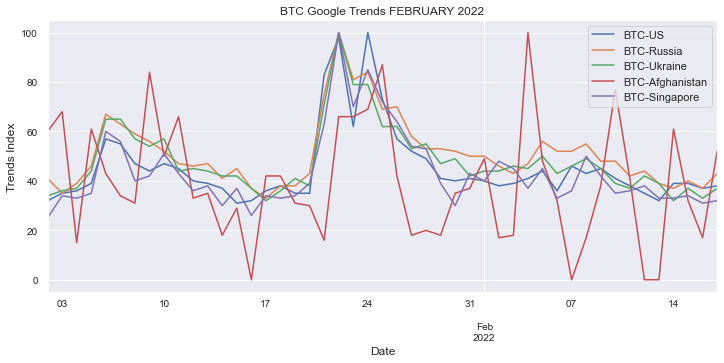

In [26]:
sns.set(color_codes=True, palette='deep')

ht = hf_trends.plot(figsize = (12,5),x="date", y=['BTC-US','BTC-Russia','BTC-Ukraine','BTC-Afghanistan', 'BTC-Singapore'], 
                    title = "BTC Google Trends FEBRUARY 2022", kind="line")
ht.set_xlabel('Date')
ht.set_ylabel('Trends Index')
ht.tick_params(axis='both', which='both', labelsize=10)

plt.savefig("BTC_Google_Trends_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

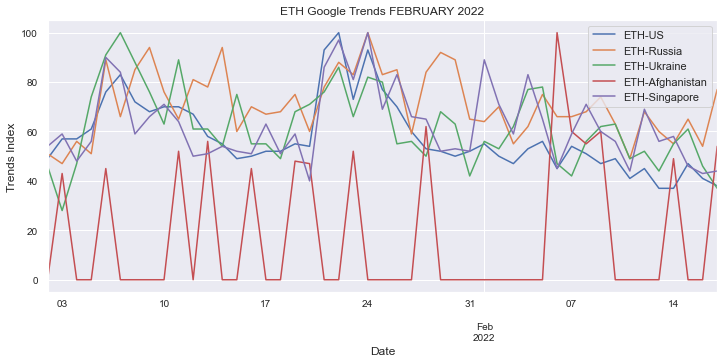

In [27]:
sns.set(color_codes=True, palette='deep')

ht = hf_trends.plot(figsize = (12,5),x="date", y=['ETH-US','ETH-Russia','ETH-Ukraine','ETH-Afghanistan','ETH-Singapore'], 
                    kind="line", title = "ETH Google Trends FEBRUARY 2022")
ht.set_xlabel('Date')
ht.set_ylabel('Trends Index')
ht.tick_params(axis='both', which='both', labelsize=10)

plt.savefig("ETH_Google_Trends_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

Cryptocurrency use—especially Bitcoin use—has spiked in Afghanistan since the U.S. and its allies chaotically exited the country after a 20-year. Afghanistan has one of the fastest rates of cryptocurrency adoption, according to blockchain analytics firm Chainalysis.A number of high-profile Bitcoin advocates used the situation in Afghanistan last week to make crude jokes, while others made wide-eyed suggestions about the way cryptocurrencies could be used to escape the economic control of repressive regimes. https://decrypt.co/79980/cryptocurrency-save-afghanistan-cardano-ethereum-cofounder

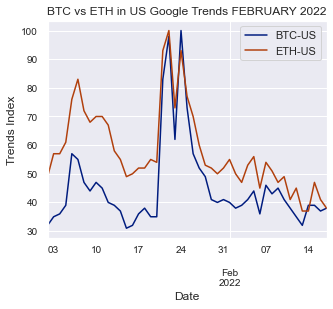

In [28]:
#BTC vs ETH trends in Afghanistan
sns.set(color_codes=True, palette='dark')

ht = hf_trends.plot(figsize = (5,4),x="date", y=['BTC-US','ETH-US'], kind="line", 
                    title = "BTC vs ETH in US Google Trends FEBRUARY 2022")
ht.set_xlabel('Date')
ht.set_ylabel('Trends Index')
ht.tick_params(axis='both', which='both', labelsize=10)

plt.savefig("BTCvsETH_US_Google_Trends_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

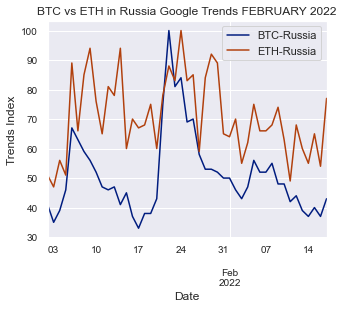

In [29]:
#BTC vs ETH trends in Russia
sns.set(color_codes=True, palette='dark')

ht = hf_trends.plot(figsize = (5,4),x="date", y=['BTC-Russia','ETH-Russia'], 
                    title = "BTC vs ETH in Russia Google Trends FEBRUARY 2022",kind="line")

ht.set_xlabel('Date')
ht.set_ylabel('Trends Index')
ht.tick_params(axis='both', which='both', labelsize=10)

plt.savefig("BTCvsETH_Russia_Google_Trends_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

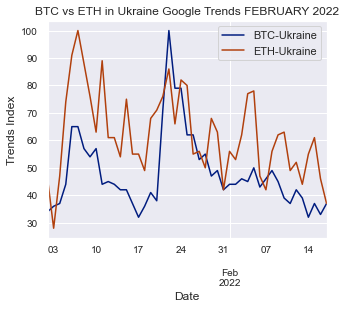

In [30]:
#BTC vs ETH trends in Ukraine
sns.set(color_codes=True, palette='dark')

ht = hf_trends.plot(figsize = (5,4),x="date", y=['BTC-Ukraine','ETH-Ukraine'], 
                    title = "BTC vs ETH in Ukraine Google Trends FEBRUARY 2022", kind="line")

ht.set_xlabel('Date')
ht.set_ylabel('Trends Index')
ht.tick_params(axis='both', which='both', labelsize=10)

plt.savefig("BTCvsETH_Ukraine_Google_Trends_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

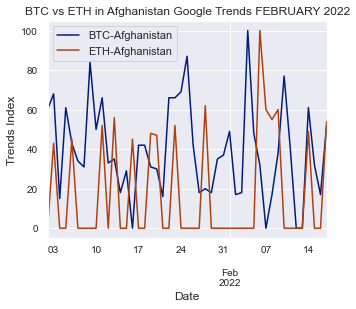

In [31]:
#BTC vs ETH trends in Afghanistan
sns.set(color_codes=True, palette='dark')

ht = hf_trends.plot(figsize = (5,4),x="date", y=['BTC-Afghanistan','ETH-Afghanistan'], 
                    title = "BTC vs ETH in Afghanistan Google Trends FEBRUARY 2022", kind="line")

ht.set_xlabel('Date')
ht.set_ylabel('Trends Index')
ht.tick_params(axis='both', which='both', labelsize=10)

plt.savefig("BTCvsETH_Afghanistan_Google_Trends_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)

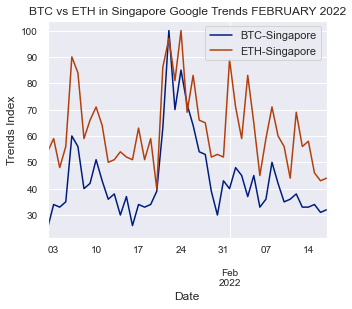

In [32]:
#BTC vs ETH trends in Singapore
sns.set(color_codes=True, palette='dark')

ht = hf_trends.plot(figsize = (5,4),x="date", y=['BTC-Singapore','ETH-Singapore'], 
                    title = "BTC vs ETH in Singapore Google Trends FEBRUARY 2022", kind="line")

ht.set_xlabel('Date')
ht.set_ylabel('Trends Index')
ht.tick_params(axis='both', which='both', labelsize=10)

plt.savefig("BTCvsETH_Singapore_Google_Trends_FEBRUARY2022.jpg",transparent=False, bbox_inches='tight',pad_inches=0.1)